In [0]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import linear_model

from sklearn import metrics
import matplotlib.pyplot as plt

%matplotlib inline


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
%cd /content/drive/My Drive/Colab Notebooks/ML_and_NN_course/module 1

/content/drive/My Drive/Colab Notebooks/ML_and_NN_course/module 1


In [0]:
from utils import *

## Dataset

In [57]:
df=pd.read_csv("kc_house_data.csv") #Load the dataset from csv file
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [58]:
df.describe() #Gives the information about the data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [59]:
df.columns #Columns in dataframe

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [0]:
# Dropping the id and date columns
df = df.drop(['id', 'date'],axis=1)

In [61]:
df.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


### Visualizing data

More on Markers: https://matplotlib.org/3.1.1/api/markers_api.html

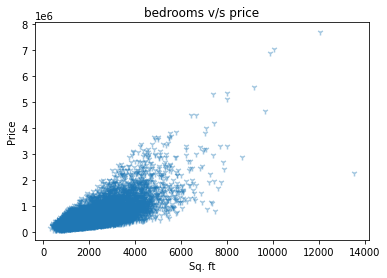

In [62]:
plt.scatter(df['sqft_living'],df['price'],alpha=0.4,marker='1')
plt.title("bedrooms v/s price")
plt.xlabel("Sq. ft")
plt.ylabel("Price")
plt.show()

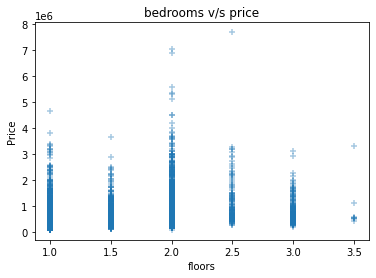

In [63]:
plt.scatter(df['floors'],df['price'],alpha=0.4,marker='+')
plt.title("bedrooms v/s price")
#plt.xlabel("No. of bedrooms")
plt.xlabel('floors')
plt.ylabel("Price")
plt.show()

## Prepare the dataset

In [0]:
# First extract the target variable which is our House prices
Y = df.price.values

# Drop price from the house dataframe and create a matrix out of the house data
df = df.drop(['price'], axis=1)
X=np.matrix(df)
# Store the column/feature names into a list "colnames"
colnames = df.columns

> **Training data:** actual dataset that we use to train the model. The model sees and learns from this data.
 

> **Validation data:** sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters




In [0]:
#Splitting the data into training and validation dataset
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size = 0.8,random_state=3)

## Training the model
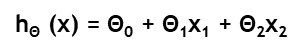

In [65]:
# Using Linear Regression

lr = linear_model.LinearRegression(normalize=True) #Creates the Linear regression model 
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [0]:
lr??

In [67]:
ranking(np.abs(lr.coef_), colnames)

{'bathrooms': 0.07,
 'bedrooms': 0.06,
 'condition': 0.04,
 'floors': 0.01,
 'grade': 0.16,
 'lat': 1.0,
 'long': 0.35,
 'sqft_above': 0.0,
 'sqft_basement': 0.0,
 'sqft_living': 0.0,
 'sqft_living15': 0.0,
 'sqft_lot': 0.0,
 'sqft_lot15': 0.0,
 'view': 0.09,
 'waterfront': 0.94,
 'yr_built': 0.0,
 'yr_renovated': 0.0,
 'zipcode': 0.0}

In [49]:
predictions=lr.predict(X_test)
test_error=metrics.mean_absolute_error(Y_test,predictions)
print("Mean absolute error on Test set: ",test_error)

predictions=lr.predict(X_train)
training_error=metrics.mean_absolute_error(Y_train,predictions)
print("Mean absolute error on Training set: ",training_error)

Mean absolute error on Test set:  123368.26850172326
Mean absolute error on Training set:  127004.29297099858


## Prediction

In [50]:
index=4 #Change  Index to see how it performs on other examples

check=X_train[index] 
check=np.array(check).reshape(1,-1)

print("predicted Value:",lr.predict(check))
print("True value: ",Y_train[index])

predicted Value: [445540.11818955]
True value:  499990.0


In [51]:
Y.max(),Y.min(),Y.mean()

(7700000.0, 75000.0, 540088.1417665294)

In [68]:
X_train[index]

matrix([[ 4.00000e+00,  2.75000e+00,  2.62000e+03,  7.00100e+03,
          2.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
          8.00000e+00,  2.62000e+03,  0.00000e+00,  2.01200e+03,
          0.00000e+00,  9.80450e+04,  4.74838e+01, -1.21769e+02,
          2.62000e+03,  6.54300e+03]])

In [69]:
df.iloc[9]

bedrooms             3.0000
bathrooms            2.5000
sqft_living       1890.0000
sqft_lot          6560.0000
floors               2.0000
waterfront           0.0000
view                 0.0000
condition            3.0000
grade                7.0000
sqft_above        1890.0000
sqft_basement        0.0000
yr_built          2003.0000
yr_renovated         0.0000
zipcode          98038.0000
lat                 47.3684
long              -122.0310
sqft_living15     2390.0000
sqft_lot15        7570.0000
Name: 9, dtype: float64

## Checking Prediction for house

In [0]:
# change these values according to your house 
bedrooms       =   3.0000
bathrooms      =   2.0000
sqft_living    =   1680.0000
sqft_lot       =   8080.0000
floors         =   1.0000
waterfront     =   0.0000
view           =   0.0000
condition      =   3.0000
grade          =   8.0000
sqft_above     =   1680.0000
sqft_basement  =   0.0000
yr_built       =  1987.0000
yr_renovated   =   0.0000
zipcode        =  98074.0000
lat            =   47.6168
long           =   -122.0450
sqft_living15  =   1800.0000
sqft_lot15     =   7503.0000


#Creating array from the values taken
my_house=np.array([bedrooms,bathrooms, sqft_living, sqft_lot ,floors ,waterfront ,view ,condition,  grade,sqft_above,
          sqft_basement, yr_built, yr_renovated,zipcode, lat, long ,sqft_living15 ,sqft_lot15 ])

In [55]:
print("predicted Value:",lr.predict(my_house.reshape(1,-1))) #Predicting the value

predicted Value: [440695.20018513]
